## Submodule-2.1 : Machine Learning using Multi-Fidelity Data

## Table of Contents
#### 1. [Setting Programming Environment](#Setting-Programming-Environment)
#### 2. [Gaussian Process Regression](#Gaussian-Process-Regression)
#### 3. [Multi-fidelity Deep Neural Network](#Multi-fidelity-Deep-Neural-Network)

## Setting Programming Environment

In [13]:
!pip install GPy

# Gaussian Process Regression

## Noiseless Data
<img src="Sample.png" width="200" height="200" alt="Alternative text" />
<img src="GP_BASIC_0.png" width="200" height="200" alt="Alternative text" />
<img src="GP_BASIC.png" alt="Alternative text" />


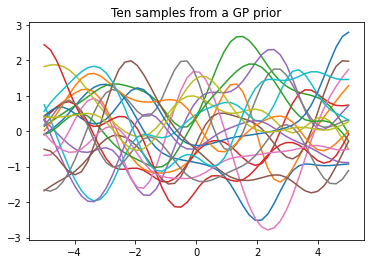

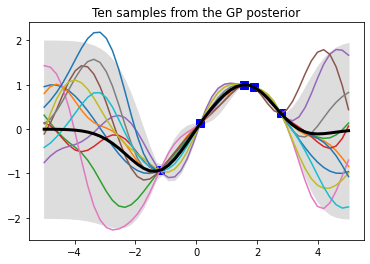

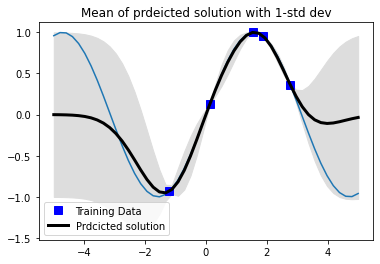

In [2]:
### Without any Package

import scipy
import numpy as np
import matplotlib.pyplot as plt

def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1.0
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)


N = 5         # number of training points.
n = 50         # number of test points.
noise = 0.0000    # noise variance.

Xtrain = np.random.uniform(-5, 5, size=(N,1))
ytrain = np.sin(Xtrain) 

Xtest = np.linspace(-5, 5, n).reshape(-1,1)


##  Prior
K_ss = kernel(Xtest, Xtest)
f_prior = np.random.multivariate_normal(mean=np.zeros(n), cov=K_ss, size=10)
plt.plot(Xtest, f_prior.T)

# OR
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n))
f_prior = L @ np.random.normal(size=(n,10)) #np.dot(L, np.random.normal(size=(n,10)))
plt.plot(Xtest, f_prior)
plt.title('Ten samples from a GP prior')
plt.show()

# Posterior
K = kernel(Xtrain, Xtrain)
K_inv = np.linalg.inv(K + noise*np.eye(N))
K_st = kernel(Xtrain, Xtest)

mu_st = K_st.T@K_inv@ytrain.squeeze()
cov = K_ss - K_st.T@K_inv@K_st
stdv = np.sqrt(np.diag(cov)).squeeze()

# Draw samples from the posterior at test points. 
f_post = np.random.multivariate_normal(mean=mu_st.squeeze(), cov=cov, size=10).T

plt.plot(Xtest, np.sin(Xtest))
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu_st-2*stdv, mu_st+2*stdv, color="#dddddd")
plt.plot(Xtest, mu_st, 'k-', lw=3)
plt.title('Ten samples from the GP posterior')
plt.show()


plt.plot(Xtest, np.sin(Xtest))
plt.plot(Xtrain, ytrain, 'bs', ms=8, label="Training Data")
plt.plot(Xtest, mu_st, 'k-', lw=3, label="Prdcicted solution")
plt.gca().fill_between(Xtest.flat, mu_st-1.0*stdv, mu_st+1.0*stdv, color="#dddddd")
plt.title('Mean of prdeicted solution with 1-std dev')
plt.legend()
plt.show()


## Noise Data

<font size = "5">$y = f(x) + \epsilon,~~\epsilon \sim \mathcal{N}(0, \sigma_y^2)\\$
$\mathbf{K}_y = \mathbf{K} + \sigma_y^2 \mathbf{I}$
<img src="GP_NP.png" alt="Alternative text" />


<img src="GP_BASIC_NL.png" alt="Alternative text" />

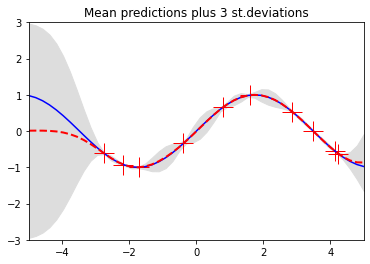

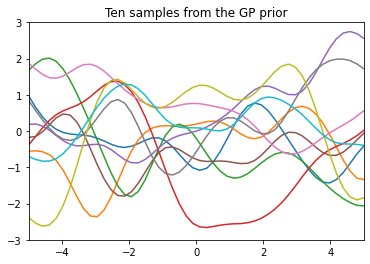

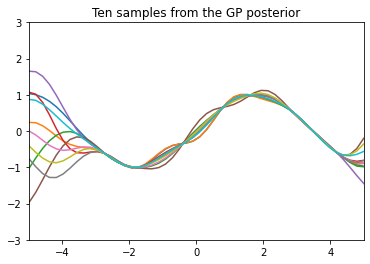

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl


# True unknown function to be eproximated
f = lambda x: np.sin(0.9*x).flatten()


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)


# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])

# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')

# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()

  std_periodic.  |  value  |  constraints  |  priors
  variance       |    1.0  |      +ve      |        
  period         |    1.0  |      +ve      |        
  lengthscale    |    1.0  |      +ve      |        


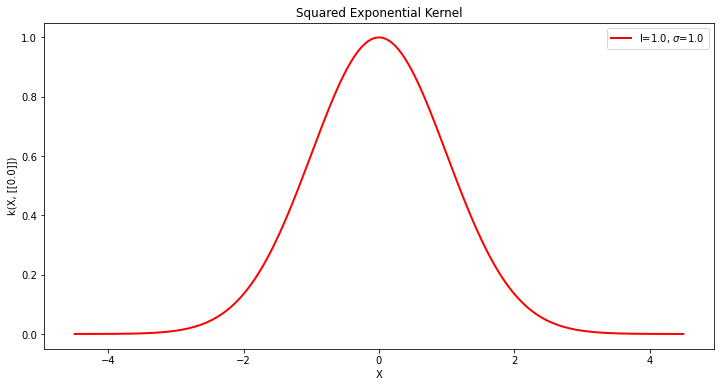

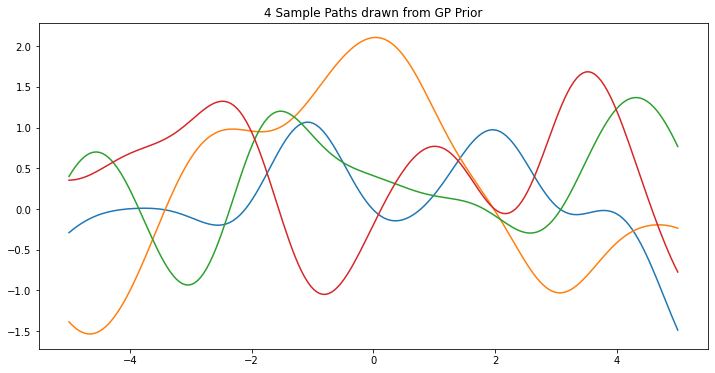

Text(0.5, 1.0, '4 Sample Paths drawn from GP Prior')

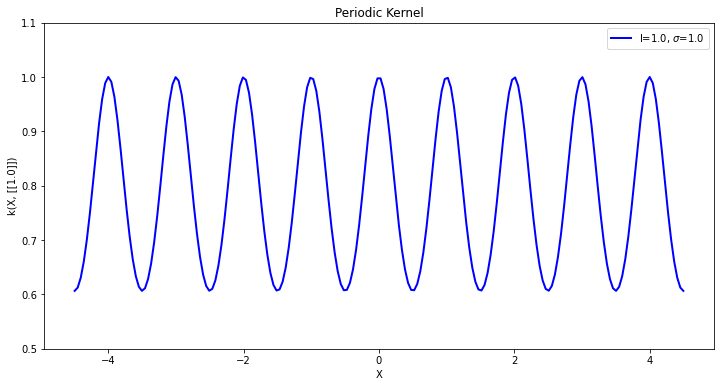

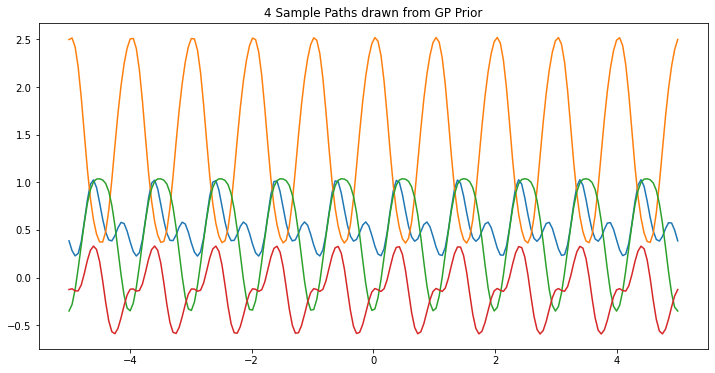

In [7]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

ker1 = GPy.kern.RBF(input_dim=1, variance = 1.0, lengthscale=1.0)
ker2 = GPy.kern.StdPeriodic(input_dim=1, variance = 1.0, lengthscale=1.0)
print(ker2)

xmin=-5
xmax=5
N=200
X = np.linspace(xmin, xmax, N)[:, None]
mu = np.zeros((N)) 
C = ker1.K(X,X)

fig, ax = plt.subplots()
ker1.plot(ax=ax, linewidth=2, color="r", label="l=1.0, $\sigma$=1.0")
ax.legend()
ax.set_title("Squared Exponential Kernel")
Z1 = np.random.multivariate_normal(mu,C,4)

fig1, ax1 = plt.subplots() 
for i in range(4):
    plt.plot(X[:],Z1[i,:])

ax1.set_title("4 Sample Paths drawn from GP Prior")
plt.show()



fig2, ax2 = plt.subplots()
ker2.plot(ax=ax2, linewidth=2, color="b", label="l=1.0, $\sigma$=1.0")
ax2.legend(loc="upper right")
ax2.set_title("Periodic Kernel")
ax2.set_ylim([0.5,1.1])
C2 = ker2.K(X,X)
Z2 = np.random.multivariate_normal(mu,C2,4)


fig3, ax3 = plt.subplots() 
for i in range(4):
    plt.plot(X[:],Z2[i,:])

ax3.set_title("4 Sample Paths drawn from GP Prior")




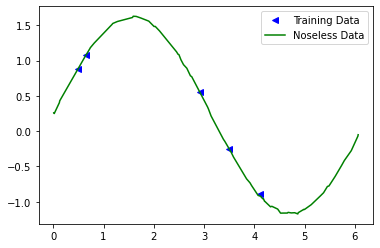


Name : GP regression
Objective : 6.67286256002627
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        



Name : GP regression
Objective : 2.226081621557874
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     1.9948351888758011  |      +ve      |        
  rbf.lengthscale          |     1.7819011223270376  |      +ve      |        
  Gaussian_noise.variance  |  1.037150046119754e-10  |      +ve      |        


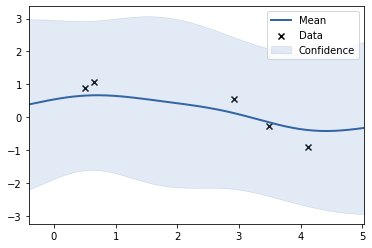

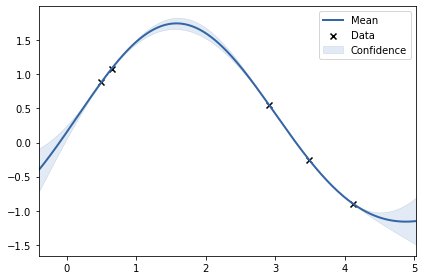

In [2]:
import GPy
import numpy as np
import matplotlib.pyplot as plt

N=5 # Number of training points
Nstar = 70 # number of test points

X = np.sort(np.random.rand(N+Nstar, 1)*6.14, axis=0)
Y = np.sin(X) + np.random.randn(*X.shape) * 0.008

perm = np.random.permutation(X.shape[0])
x_tr = X[np.sort(perm[0:N],axis=0),:]
Y_tr = Y[np.sort(perm[0:N],axis=0),]
x_star = X[np.sort(perm[N:N+Nstar],axis=0),:]
Y_star = Y[np.sort(perm[N:N+Nstar],axis=0),:]



### Normalize Data
Ymean = Y.mean()
Ystd = Y.std()
Y_tr-=Ymean
Y_tr/=Ystd


Y_star -= Ymean
Y_star /= Ystd

# plot data
plt.plot(x_tr,Y_tr, 'b<',label='Training Data')
plt.plot(x_star,Y_star, '-g',label='Noseless Data')
plt.legend()
plt.show()


dim_1 = x_tr.shape[1]
# Define RBF Kernel also known as Squared Exponential kernel
k = GPy.kern.RBF(dim_1)

#Define Gaussian Process Regression Model
m = GPy.models.GPRegression(X=x_tr, Y=Y_tr, kernel=k)
print(m)

fig, ax = plt.subplots()
m.plot(ax=ax)

m.optimize(messages=1)
m.plot()
print(m)




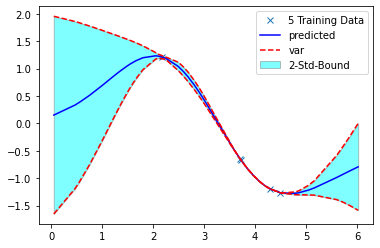

In [7]:
mu,var = m.predict(x_star)
plt.plot(x_tr, Y_tr, "x", label="5 Training Data")
plt.plot(x_star, mu, '-b',label='predicted')
plt.plot(x_star, mu+2*np.sqrt(var), 'r--',label='var')
plt.plot(x_star, mu-2*np.sqrt(var), 'r--')
plt.legend()
vv = 2*np.sqrt(var)
plt.fill_between(x_star[:,0], (mu-vv)[:,0], (mu+vv)[:,0], alpha=0.5, edgecolor='gray', facecolor='cyan',\
                 label="2-Std-Bound")
plt.legend()
#plt.ylim((-2.5, 2.5))
plt.show()
#Y_sim = m.posterior_samples(x_star)
#plt.plot(x_star, Y_sim[:,0,:])



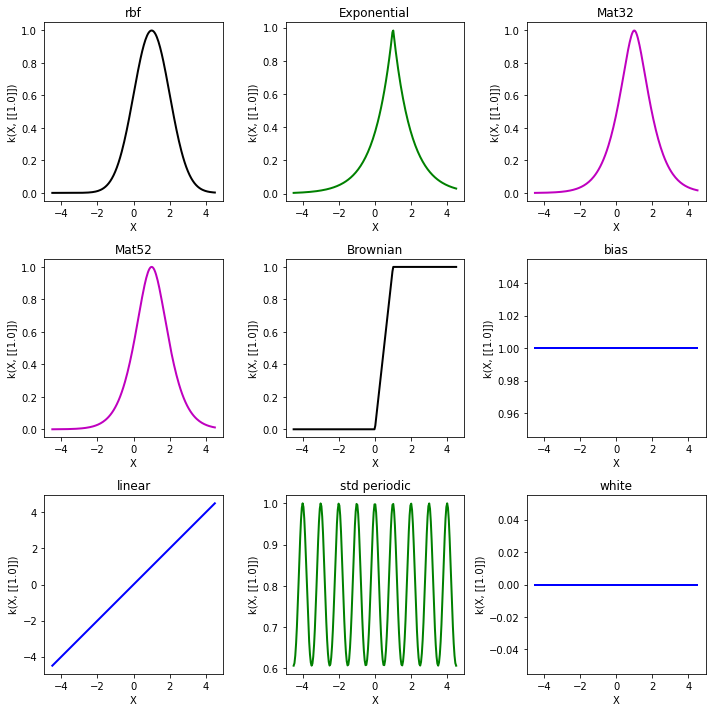

In [4]:
from random import randrange
import GPy
import matplotlib.pyplot as plt
import numpy as np

figure, axes = plt.subplots(3,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), \
         GPy.kern.Matern52(1), GPy.kern.Brownian(1), GPy.kern.Bias(1), \
         GPy.kern.Linear(1), GPy.kern.StdPeriodic(1), GPy.kern.White(1)]

col = ['r', 'b', 'g', 'b', 'm', 'k']

for k,a in zip(kerns, axes.flatten()):
    j = np.random.randint(0, high=6, size=1, dtype=int)
    k.plot(ax=a, x=1, color=col[j[0]])
    a.set_title(k.name.replace('_', ' '))

  Mat52.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        


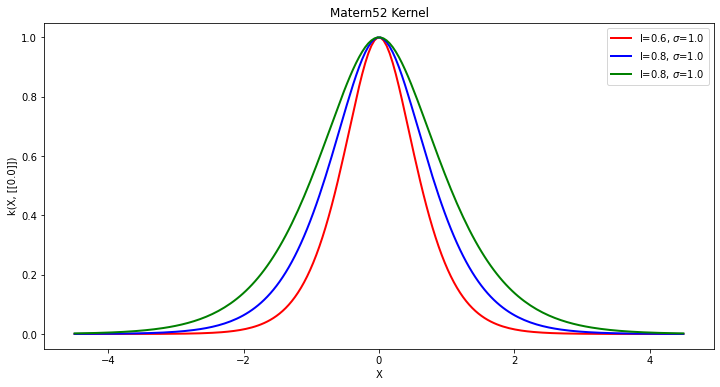

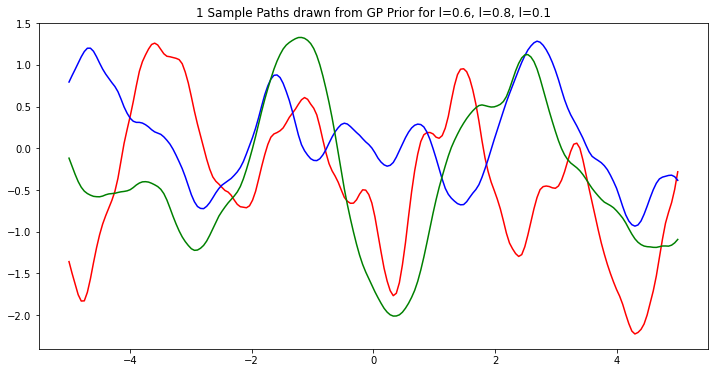

In [10]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)

# Define Kernel Using GPy
ker1 = GPy.kern.Matern52(input_dim=1, variance = 1.0, lengthscale=0.6)
ker2 = GPy.kern.Matern52(input_dim=1, variance = 1.0, lengthscale=0.8)
ker3 = GPy.kern.Matern52(input_dim=1, variance = 1.0, lengthscale=1.0)

xmin=-5
xmax=5
N=200
X = np.linspace(xmin, xmax, N)[:, None]
mu = np.zeros((N)) 
C1 = ker1.K(X,X)
C2 = ker2.K(X,X)
C3 = ker3.K(X,X)
fig, ax = plt.subplots()
ker1.plot(ax=ax, linewidth=2, color="r", label="l=0.6, $\sigma$=1.0")
ker2.plot(ax=ax, linewidth=2, color="b", label="l=0.8, $\sigma$=1.0")
ker3.plot(ax=ax, linewidth=2, color="g", label="l=0.8, $\sigma$=1.0")
ax.legend()
ax.set_title("Matern52 Kernel")

Z1 = np.random.multivariate_normal(mu,C1,1)
Z2 = np.random.multivariate_normal(mu,C2,1)
Z3 = np.random.multivariate_normal(mu,C3,1)
fig, ax = plt.subplots() 
plt.plot(X[:],Z1[0,:], "-r")
plt.plot(X[:],Z2[0,:], "-b")
plt.plot(X[:],Z3[0,:], "-g")

ax.set_title("1 Sample Paths drawn from GP Prior for l=0.6, l=0.8, l=0.1")
plt.show()


In [2]:
%pip install notutils
%pip install mlai
%pip install gpy
%pip install pyDOE
%pip install emukit
%pip install --upgrade numpy

  Using cached notutils-0.0.1-py3-none-any.whl (4.5 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached mlai-0.1.2-py2.py3-none-any.whl (42 kB)
  Using cached pods-0.1.13-py2.py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 1.5 MB 5.0 MB/s eta 0:00:01
  Using cached paramz-0.9.5.tar.gz (71 kB)
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=71f2d580a655a868c59140a7e2d9a454d263637e9cfdc594e09cb820b9e7b990
  Stored in directory: /Users/raj/Library/Caches/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built paramz
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached emukit-0.4.9-py3-none-any.whl (241 kB)
  Using cached emcee-3.1.1-py2.py3-none-any.whl (45 kB)
     |████████████████████████████████| 26.5 MB 5.3

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 16.9 MB 4.7 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.4.0 requires daal==2021.3.0, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.21.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


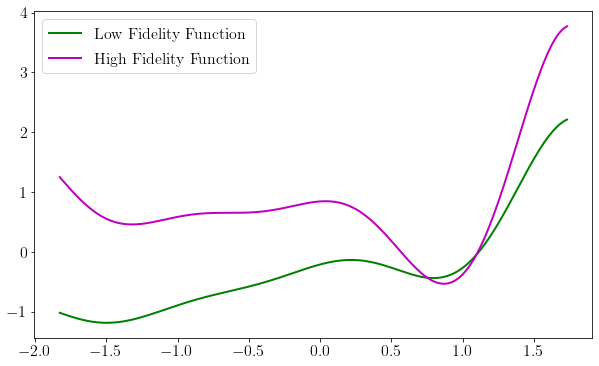

 /Users/raj/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log
 /Users/raj/opt/anaconda3/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 1/25, f = -6.342520898336709
Optimization restart 2/25, f = -6.342521014824495
Optimization restart 3/25, f = -6.342521132068411
Optimization restart 4/25, f = -6.3425210852291025
Optimization restart 5/25, f = -6.342307263888105
Optimization restart 6/25, f = -6.3425212102761614
Optimization restart 7/25, f = -6.342521257886532
Optimization restart 8/25, f = -6.3425212541579965
Optimization restart 9/25, f = -6.342520949801971
Optimization restart 10/25, f = -6.3425211801279735
Optimization restart 11/25, f = -6.342521013238191
Optimization restart 12/25, f = -6.342521070229777
Optimization restart 13/25, f = -6.342521143361872
Optimization restart 14/25, f = -6.34252111595267
Optimization restart 15/25, f = -6.342520519198143
Optimization restart 16/25, f = -6.342521127047302
Optimization restart 17/25, f = -6.3425208974810925
Optimization restart 18/25, f = -5.6564357271433945
Optimization restart 19/25, f = -6.342520970250252
Optimization restart 20/25, f = -6.

 /Users/raj/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log



Optimization restart 4/15, f = 6.922142832757091
Optimization restart 5/15, f = 6.922142832782649
Optimization restart 6/15, f = 6.922142832757225
Optimization restart 7/15, f = 7.172180371809869
Optimization restart 8/15, f = 6.922142832781401
Optimization restart 9/15, f = 6.922142832757476
Optimization restart 10/15, f = 6.922142832757092
Optimization restart 11/15, f = 6.922142832760026
Optimization restart 12/15, f = 6.922142832757292
Optimization restart 13/15, f = 6.922142832757915
Optimization restart 14/15, f = 6.9221428327859575
Optimization restart 15/15, f = 6.922142832893383


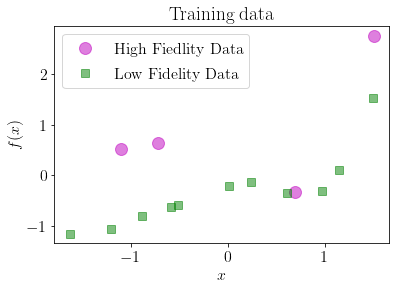

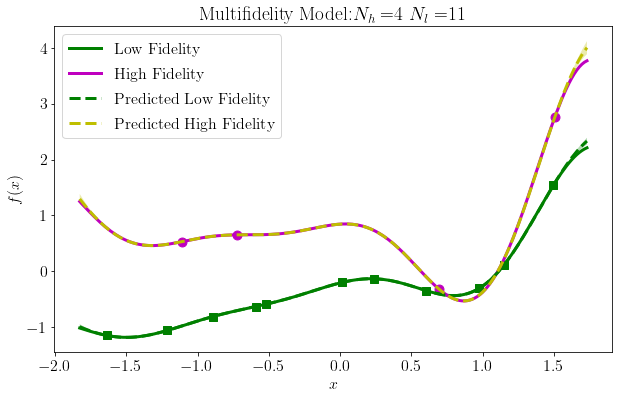

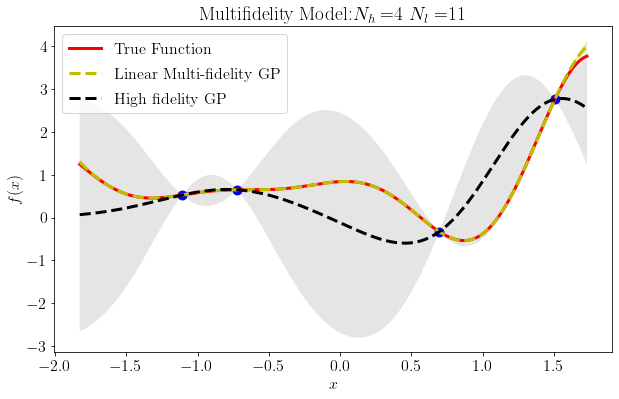

In [5]:
import numpy as np
np.random.seed(20)
import GPy
import mlai.plot as plot
import mlai
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays
import matplotlib.pyplot as plt
from pyDOE import lhs



def high_fidelity(x):
    return (6.0*x-2.0)**2*np.sin(12.0*x-4.0)


def low_fidelity(x):
    return 0.5*high_fidelity(x) + 10.0*(x-0.5) - 5.0


def Normalize(X, X_m, X_s):
    return (X-X_m)/(X_s)



N_H = 4
N_L = 11

D = 1
fig_num = 1
noise_L = 0.00
noise_H = 0.00
lb = 0.0
ub = 1.0
# Training data    
X_L = lb + (ub-lb)*lhs(D, N_L)
y_L = low_fidelity(X_L) + noise_L*np.random.randn(N_L,D)



X_H = lb + (ub-lb)*lhs(D, N_H)
y_H = high_fidelity(X_H) + noise_H*np.random.randn(N_H,D)


## Test Data
x_plot = np.linspace(0, 1, 200)[:, np.newaxis]
y_plot_l = low_fidelity(x_plot)
y_plot_h = high_fidelity(x_plot)





X = np.vstack((X_L,X_H))
X_m = np.mean(X, axis = 0)
X_s = np.std(X, axis = 0)   
X_L = Normalize(X_L, X_m, X_s)
X_H = Normalize(X_H, X_m, X_s)
lb = Normalize(lb, X_m, X_s)
ub = Normalize(ub, X_m, X_s)
x_plot = Normalize(x_plot, X_m, X_s)

y = np.vstack((y_L,y_H))
y_m = np.mean(y, axis = 0)
y_s = np.std(y, axis = 0)   
y_L = Normalize(y_L, y_m, y_s)
y_H = Normalize(y_H, y_m, y_s)
y_plot_l = Normalize(y_plot_l, y_m, y_s)
y_plot_h = Normalize(y_plot_h, y_m, y_s)

## Train Data
x_train_l = X_L 
x_train_h = X_H
y_train_l = y_L 
y_train_h = y_H 

plt.subplots(figsize=plot.big_wide_figsize)
plt.plot(x_plot, y_plot_l, "-g", lw=2.0, label="Low Fidelity Function")
plt.plot(x_plot, y_plot_h, "-m", lw=2.0, label="High Fidelity Function")
plt.legend()
mlai.write_figure("LF_HF_Functions", directory='./uq')

plt.show()


X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], 
                                                    [y_train_l, y_train_h])

# Plot the training data
plt.figure(facecolor='w')
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.plot(x_train_h, y_train_h,'mo', markersize = 12, alpha = 0.5, label = "High Fiedlity Data")
plt.plot(x_train_l, y_train_l,'gs', markersize = 8, alpha = 0.5, label = "Low Fidelity Data")
plt.title("Training data")
plt.legend()
ax = plt.gca()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
data_title = "data_" + str(fig_num) 
mlai.write_figure(data_title, directory='./uq')


kernels = [GPy.kern.RBF(1), GPy.kern.RBF(1)]
lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)
gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel,\
                                               n_fidelities=2)
gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)
gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)
lin_mf_model = GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=25)
lin_mf_model.optimize()


X_plot = convert_x_list_to_array([x_plot, x_plot])
X_plot_l = X_plot[:len(x_plot)]
X_plot_h = X_plot[len(x_plot):]

lf_mean_lin_mf_model, lf_var_lin_mf_model = lin_mf_model.predict(X_plot_l)
lf_std_lin_mf_model = np.sqrt(lf_var_lin_mf_model)
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)
hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)


## Plot the results


#x_plot = np.linspace(0, 1, 200)[:, np.newaxis]
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.fill_between(x_plot.flatten(), (lf_mean_lin_mf_model - 1.96*lf_std_lin_mf_model).flatten(), 
                 (lf_mean_lin_mf_model + 1.96*lf_std_lin_mf_model).flatten(), facecolor='g', alpha=0.3)
ax.fill_between(x_plot.flatten(), (hf_mean_lin_mf_model - 1.96*hf_std_lin_mf_model).flatten(), 
                 (hf_mean_lin_mf_model + 1.96*hf_std_lin_mf_model).flatten(), facecolor='y', alpha=0.3)

ax.plot(x_plot, y_plot_l, 'g', linewidth=3)
ax.plot(x_plot, y_plot_h, 'm', linewidth=3)
ax.plot(x_plot, lf_mean_lin_mf_model, '--', color='g', linewidth=3)
ax.plot(x_plot, hf_mean_lin_mf_model, '--', color='y', linewidth=3)
ax.scatter(x_train_l, y_train_l, marker="s", color='g', s=80)
ax.scatter(x_train_h, y_train_h,  marker="o", color='m', s=80)
ax.set_ylabel('$f(x)$')
ax.set_xlabel('$x$')
title="Multifidelity Model:" + "$N_h=$"+ str(N_H) + "  $N_l=$" + str(N_L)
ax.set_title(title)

ax.legend(['Low Fidelity', 'High Fidelity', 'Predicted Low Fidelity', \
           'Predicted High Fidelity'])

fig_name = 'linear-multi-fidelity-model_'+ str(fig_num)+ '.png'


mlai.write_figure(fig_name, directory='./uq')


## Single fidelity vs Multi-fidelity
kernel = GPy.kern.RBF(1)
high_gp_model = GPy.models.GPRegression(x_train_h, y_train_h, kernel)
high_gp_model.Gaussian_noise.fix(0)

high_gp_model.optimize_restarts(15)

hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plot)
hf_std_hf_gp_model = np.sqrt(hf_var_high_gp_model)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

ax.fill_between(x_plot.flatten(), (hf_mean_lin_mf_model - 1.96*hf_std_lin_mf_model).flatten(), 
                 (hf_mean_lin_mf_model + 1.96*hf_std_lin_mf_model).flatten(), facecolor='y', alpha=0.3)
ax.fill_between(x_plot.flatten(), (hf_mean_high_gp_model - 1.96*hf_std_hf_gp_model).flatten(), 
                 (hf_mean_high_gp_model + 1.96*hf_std_hf_gp_model).flatten(), facecolor='k', alpha=0.1)

ax.plot(x_plot, y_plot_h, color='r', linewidth=3)
ax.plot(x_plot, hf_mean_lin_mf_model, '--', color='y', linewidth=3)
ax.plot(x_plot, hf_mean_high_gp_model, 'k--', linewidth=3)
ax.scatter(x_train_h, y_train_h, marker="o", color='b', s=80)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

ax.legend(['True Function', 'Linear Multi-fidelity GP', 'High fidelity GP'])

title="Multifidelity Model:" + "$N_h=$"+ str(N_H) + "  $N_l=$" + str(N_L)

ax.set_title(title)

fig_name = 'linear-multi-fidelity-high-fidelity-gp_'+ str(fig_num)+ '.png'

mlai.write_figure(fig_name, directory='./uq')




## Multi-fidelity Deep Neural Network

n: 1000, loss: 3.656e+00, loss_lf: 2.703e+00, loss_hf: 7.138e-01
n: 2000, loss: 5.050e-01, loss_lf: 2.545e-01, loss_hf: 1.417e-02
n: 3000, loss: 2.946e-01, loss_lf: 7.560e-02, loss_hf: 8.657e-04
n: 4000, loss: 2.298e-01, loss_lf: 3.119e-02, loss_hf: 7.511e-04
n: 5000, loss: 2.084e-01, loss_lf: 2.633e-02, loss_hf: 6.609e-04
n: 6000, loss: 1.937e-01, loss_lf: 2.351e-02, loss_hf: 5.517e-04
n: 7000, loss: 1.831e-01, loss_lf: 2.110e-02, loss_hf: 4.560e-04
n: 8000, loss: 1.747e-01, loss_lf: 2.026e-02, loss_hf: 3.481e-04
n: 9000, loss: 1.652e-01, loss_lf: 1.980e-02, loss_hf: 2.279e-04
n: 10000, loss: 1.563e-01, loss_lf: 1.923e-02, loss_hf: 1.767e-04
n: 11000, loss: 1.477e-01, loss_lf: 1.882e-02, loss_hf: 1.583e-04
n: 12000, loss: 1.406e-01, loss_lf: 1.861e-02, loss_hf: 1.575e-04
n: 13000, loss: 1.179e-01, loss_lf: 9.327e-04, loss_hf: 1.766e-04
n: 14000, loss: 1.126e-01, loss_lf: 2.849e-05, loss_hf: 2.044e-04
n: 15000, loss: 1.078e-01, loss_lf: 1.923e-05, loss_hf: 2.220e-04
n: 16000, loss: 1.0

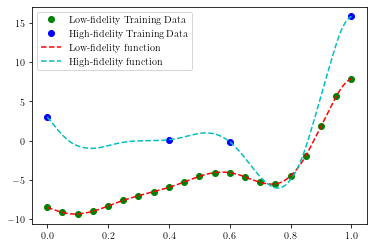

In [15]:
## Code for Multi-fidelity DNN
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=1234)
tf.random.set_seed(1234)

class DNN:
    def __init__(self):
        pass
    
    def hyper_initial(self, layers):
        L = len(layers)
        W = []
        b = []
        for l in range(1, L):
            in_dim = layers[l-1]
            out_dim = layers[l]
            std = np.sqrt(2/(in_dim + out_dim))
            weight = tf.Variable(tf.random.truncated_normal(shape=[in_dim, out_dim], stddev=std))
            bias = tf.Variable(tf.zeros(shape=[1, out_dim]))
            W.append(weight)
            b.append(bias)

        return W, b

    def fnn(self, W, b, X, Xmin, Xmax):
        A = 2.0*(X - Xmin)/(Xmax - Xmin) - 1.0
        L = len(W)
        for i in range(L-1):
            A = tf.tanh(tf.add(tf.matmul(A, W[i]), b[i]))
        Y = tf.add(tf.matmul(A, W[-1]), b[-1])
        
        return Y
    
        
    
    def train_vars(self, W, b):
        return W + b

    

    
# Exact Low Fidelity Fucntion    
def fun_lf(x):
    y = 0.5*(6*x - 2)**2*np.sin(12*x - 4) + 10*(x - 0.5) - 5
    return y

#Exact high-fidelity function
def fun_hf(x):
    y = (6*x - 2)**2*np.sin(12*x - 4)
    return y





@tf.function
def train_step(W, b, model, x_train_lf, y_train_lf , x_train_hf, y_train_hf,opt, train=1):
    W_lf = W[0]
    W_hf_nl = W[1]
    W_hf_l = W[2] 
    b_lf =   b[0]
    b_hf_nl = b[1]
    b_hf_l = b[2]
    if train==1:
        with tf.GradientTape() as tape:
            tape.watch([W_lf, W_hf_nl,W_hf_l, b_lf, b_hf_nl, b_hf_l])
            y_pred_lf = model.fnn(W_lf, b_lf, x_train_lf, Xmin, Xmax)
            y_pred_hf_nl = model.fnn(W_hf_nl, b_hf_nl, x_train_hf, Xhmin, Xhmax)
            y_pred_hf_l = model.fnn(W_hf_l, b_hf_l, x_train_hf, Xhmin, Xhmax)
            y_pred_hf = y_pred_hf_l + y_pred_hf_nl
            loss_l2 = 0.01*tf.add_n([tf.nn.l2_loss(w_) for w_ in W_hf_nl])
            loss_lf = tf.reduce_mean(tf.square(y_pred_lf - y_train_lf))
            loss_hf =  tf.reduce_mean(tf.square(y_pred_hf - y_train_hf))
            loss = loss_lf + loss_hf + loss_l2
        grads = tape.gradient(loss, W_lf + b_lf + W_hf_nl + b_hf_nl +  W_hf_l + b_hf_l)
        opt.apply_gradients(zip(grads, W_lf + b_lf + W_hf_nl + b_hf_nl +  W_hf_l + b_hf_l))
        return loss, loss_lf, loss_hf
        
    if train == 0:
        y_pred_lf = model.fnn(W_lf, b_lf, x_train_lf, Xmin, Xmax)
        y_pred_hf_nl = model.fnn(W_hf_nl, b_hf_nl, x_train_hf, Xhmin, Xhmax)
        y_pred_hf_l = model.fnn(W_hf_l, b_hf_l, x_train_hf, Xhmin, Xhmax)
        y_pred_hf = y_pred_hf_l + y_pred_hf_nl
        return  y_pred_hf, y_pred_lf




## Dimension of Function
D = 1
#low-fidelity NN
layers_lf = [D] + 2*[20] + [1]

#nonlinear correlation
layers_hf_nl = [D+1] + 2*[10] + [1]

#linear correlation
layers_hf_l = [D+1] + [1]

#low-fidelity training data
x_lf = np.linspace(0, 1, 21).reshape((-1, 1))
y_lf = fun_lf(x_lf)

#high-fidelity training data
x_hf = np.array([0., 0.4, 0.6, 1.0]).reshape((-1, 1))

#low-fidelity training data at x_H
y_lf_hf = fun_lf(x_hf)
y_hf = fun_hf(x_hf)
X_hf = np.hstack((x_hf, y_lf_hf))

Xmin = x_lf.min(0)
Xmax = x_lf.max(0)
Ymin = y_lf.min(0)
Ymax = y_lf.max(0)

Xhmin = np.hstack((Xmin, Ymin))
Xhmax = np.hstack((Xmax, Ymax))

x_train_lf = tf.convert_to_tensor(x_lf, dtype=tf.float32)
y_train_lf = tf.convert_to_tensor(y_lf, dtype=tf.float32)
x_train_hf = tf.convert_to_tensor(X_hf, dtype=tf.float32)
y_train_hf = tf.convert_to_tensor(y_hf, dtype=tf.float32)

model = DNN()
W_lf, b_lf = model.hyper_initial(layers_lf)
W_hf_nl, b_hf_nl = model.hyper_initial(layers_hf_nl)
W_hf_l, b_hf_l = model.hyper_initial(layers_hf_l)

W=[W_lf, W_hf_nl, W_hf_l]
b=[b_lf, b_hf_nl, b_hf_l]

lr =0.001
optimizer = tf.optimizers.Adam(learning_rate=lr)



nmax = 30000
loss_c = 1.0e-3
loss_ = 1.0
n = 0

while n < nmax:
    n += 1
    loss_, loss_lf_, loss_hf_ = train_step(W, b, model, x_train_lf, y_train_lf , \
                                           x_train_hf, y_train_hf,optimizer, train=1)
    if n%1000 == 0:
        print('n: %d, loss: %.3e, loss_lf: %.3e, loss_hf: %.3e'%(n, loss_, loss_lf_, loss_hf_))
        
        
plt.figure(facecolor='w')
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=10)
plt.plot(x_lf, y_lf, 'go', label="Low-fidelity Training Data")
plt.plot(x_hf, y_hf, 'bo', label="High-fidelity Training Data")
plt.plot(x_test, y_lf_test, 'r--', label="Low-fidelity function")
plt.plot(x_test, y_hf_test, 'c--', label="High-fidelity function")
plt.legend()
plt.show()




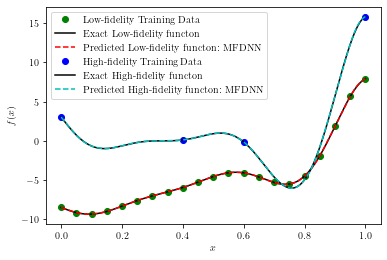

In [16]:
#prediction
import matplotlib
import matplotlib.pyplot as plt
import mlai
x_test = np.linspace(0, 1, 1000, dtype=float).reshape((-1, 1))
y_lf_ref = fun_lf(x_test)
y_hf_ref = fun_hf(x_test)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
_, y_lf_test = train_step(W, b, model, x_test, y_train_lf , x_train_hf, y_train_hf,optimizer, train=0)
X_test = np.hstack((x_test, y_lf_test))
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_hf_test, _ = train_step(W, b, model, x_test, y_train_lf , X_test, y_train_hf,optimizer, train=0)
plt.figure(facecolor='w')
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=10)

plt.plot(x_lf, y_lf, 'go', label="Low-fidelity Training Data")
plt.plot(x_test, y_lf_ref, 'k-', label="Exact Low-fidelity functon")
plt.plot(x_test, y_lf_test, 'r--', label="Predicted Low-fidelity functon: MFDNN")

plt.plot(x_hf, y_hf, 'bo', label="High-fidelity Training Data")
plt.plot(x_test, y_hf_ref, 'k-', label="Exact High-fidelity functon")
plt.plot(x_test, y_hf_test, 'c--', label="Predicted High-fidelity functon: MFDNN")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

